In [ ]:
#importing required libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report


In [ ]:
#loading dataset

file_path = 'spam.csv'
data = pd.read_csv(file_path, encoding='latin-1')

In [ ]:
print(data)

        v1                                                 v2 Unnamed: 2  \
0      ham  Go until jurong point, crazy.. Available only ...        NaN   
1      ham                      Ok lar... Joking wif u oni...        NaN   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3      ham  U dun say so early hor... U c already then say...        NaN   
4      ham  Nah I don't think he goes to usf, he lives aro...        NaN   
...    ...                                                ...        ...   
5567  spam  This is the 2nd time we have tried 2 contact u...        NaN   
5568   ham              Will Ì_ b going to esplanade fr home?        NaN   
5569   ham  Pity, * was in mood for that. So...any other s...        NaN   
5570   ham  The guy did some bitching but I acted like i'd...        NaN   
5571   ham                         Rofl. Its true to its name        NaN   

     Unnamed: 3 Unnamed: 4  
0           NaN        NaN  
1           NaN        NaN  


In [ ]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
data.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [ ]:
data.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [ ]:
data = data[[ 'v2', 'v1']]
data.columns = ['text', 'label']

In [ ]:
data['label'] = data['label'].map({'ham': 0, 'spam': 1})

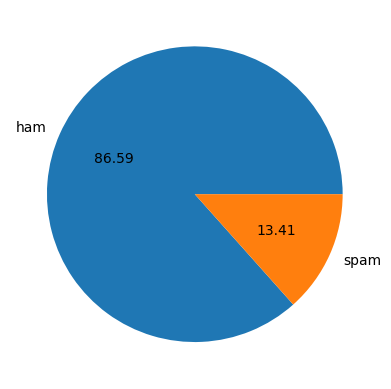

In [ ]:
plt.pie(data['label'].value_counts(), labels=['ham', 'spam'], autopct='%0.2f')
plt.show()

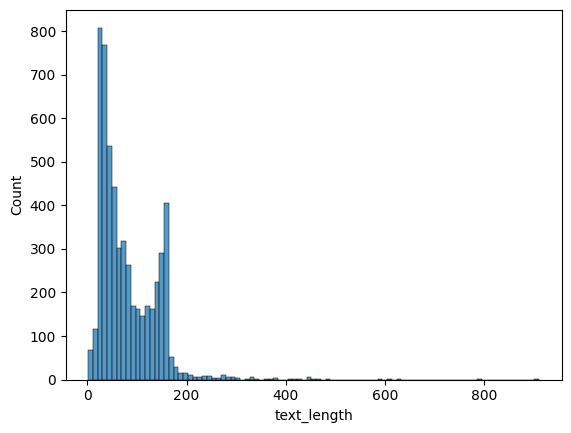

In [ ]:
data['text_length'] = data['text'].apply(len)
sns.histplot(data['text_length'])
plt.show()

In [ ]:
vectorizer = CountVectorizer()

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(data['text'], data['label'], test_size=0.2, random_state=42)

In [ ]:
X_train_transformed = vectorizer.fit_transform(X_train)
X_test_transformed = vectorizer.transform(X_test)



In [ ]:
model = MultinomialNB()
model.fit(X_train_transformed, Y_train)

MultinomialNB()

In [ ]:
model.fit(X_train_transformed, Y_train)



MultinomialNB()

In [ ]:
y_pred = model.predict(X_test_transformed)

In [ ]:
accuracy = accuracy_score(Y_test, y_pred)*100
print("Accuracy:", accuracy)

Accuracy: 98.38565022421525


In [ ]:
classification_report_results = sklearn.metrics.classification_report(Y_test, y_pred)

confusion_matrix_results = sklearn.metrics.confusion_matrix(Y_test, y_pred)

print('Classification Report:')
print(classification_report_results)

print('Confusion Matrix:')
print(confusion_matrix_results)

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       0.99      0.89      0.94       150

    accuracy                           0.98      1115
   macro avg       0.98      0.95      0.96      1115
weighted avg       0.98      0.98      0.98      1115

Confusion Matrix:
[[963   2]
 [ 16 134]]


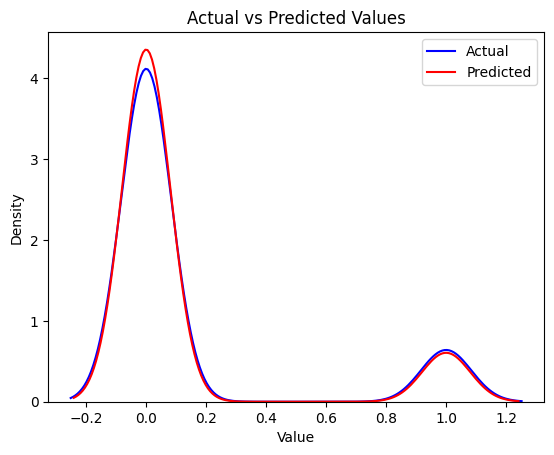

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#dataframe with actual and predicted values
df = pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred})

#kdeplot for actual and predicted values
sns.kdeplot(df['Actual'], color='blue', label='Actual')
sns.kdeplot(df['Predicted'], color='red', label='Predicted')

#title and labels
plt.title('Actual vs Predicted Values')
plt.xlabel('Value')
plt.ylabel('Density')

# Show the plot
plt.legend()
plt.show()


In [ ]:
def predict_spam(text):
  # Convert text to a list
  text_list = [text]

  # Transform the text
  transformed_text = vectorizer.transform(text_list)

  # Predict the label
  prediction = model.predict(transformed_text)[0]

  # Print the prediction
  if prediction == 0:
    print("The message is not spam.")
  else:
    print("The message is spam.")

# Get user input
user_input = input("Enter a message: ")

# Predict spam
predict_spam(user_input)


Enter a message: Urgent: Your account has been compromised. Please reset your password immediately.
The message is spam.
